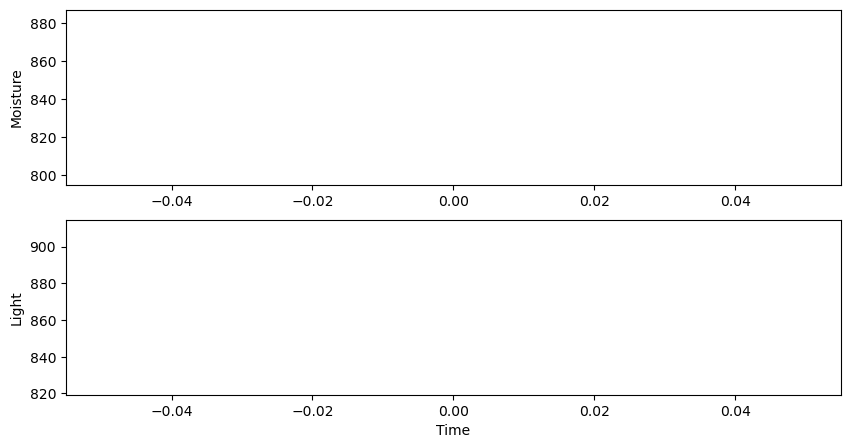

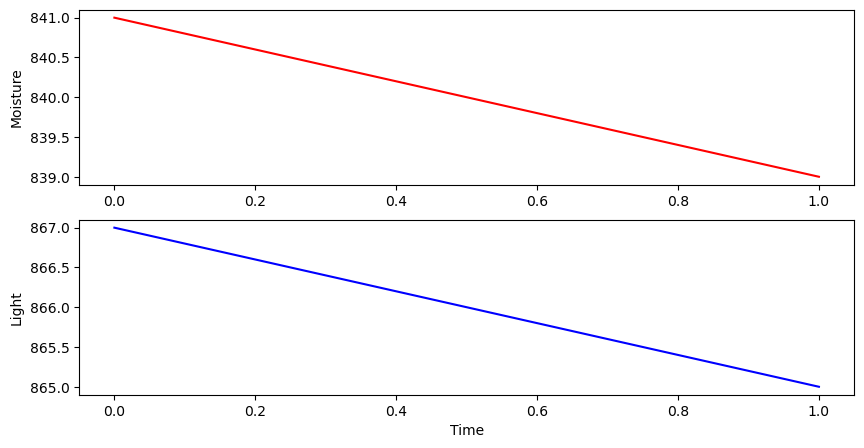

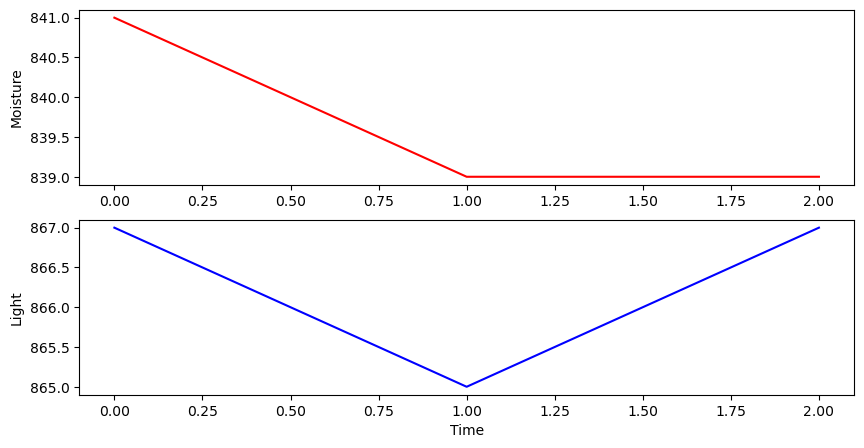

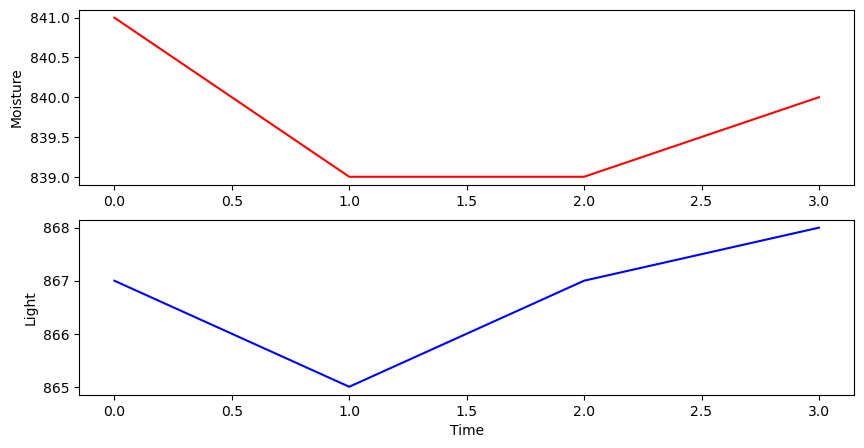

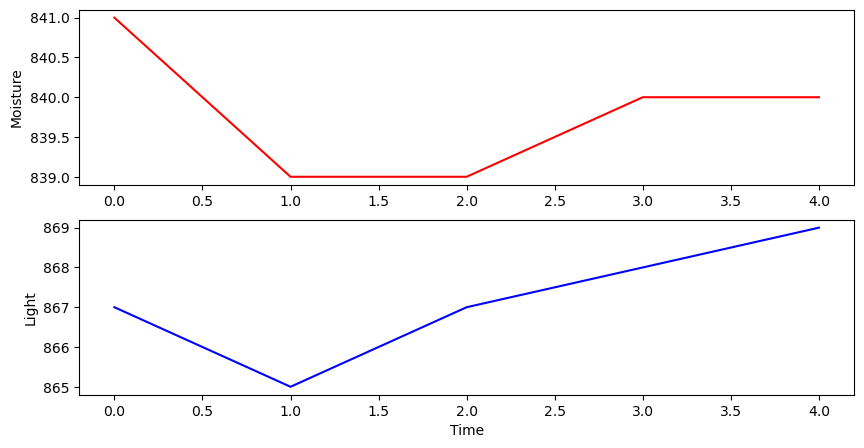

Serial connection closed.


In [74]:
import serial
import matplotlib.pyplot as plt

# Configure the serial connection
arduino_port = 'COM3'  # Replace with the correct port
baud_rate = 9600
ser = serial.Serial(arduino_port, baud_rate)

# Variables to store the data
moisture_values = []
light_values = []

# Read data from Arduino and plot the graphs
try:
    while True:
        # Read a line of data from the Arduino
        line = ser.readline().decode().strip()

        # Extract moisture and light values from the line
        moisture, light, temperature = line.split("\t")
        moisture_values.append(int(moisture.split(":")[1]))
        light_values.append(int(light.split(":")[1]))

        # Plot the graphs
        plt.figure(figsize=(10, 5))
        plt.subplot(2, 1, 1)
        plt.plot(moisture_values, 'r')
        plt.ylabel('Moisture')
        plt.subplot(2, 1, 2)
        plt.plot(light_values, 'b')
        plt.ylabel('Light')
        plt.xlabel('Time')
        plt.show(block=False)
        plt.pause(0.1)
except KeyboardInterrupt:
    ser.close()
    print('Serial connection closed.')


In [95]:
import serial
import pandas as pd
import time

# Configure the serial connection
arduino_port = 'COM3'  # Replace with the correct port
baud_rate = 9600
ser = serial.Serial(arduino_port, baud_rate)

# Initialize empty lists to store the sensor values
moisture_values = []
light_values = []
temperature_values = []

# Read sensor values from Arduino for a specific duration (15 seconds)
start_time = time.time()
while time.time() - start_time < 10:
    # Read a line of data from the Arduino
    line = ser.readline().decode().strip()

    # Check if the line contains sensor readings
    if line.startswith("Moisture:"):
        # Extract the values from the line
        values = line.split("\t")
        moisture = int(values[0].split(": ")[1])
        light = int(values[1].split(": ")[1])
        temperature = float(values[2].split(": ")[1].split(" °C")[0])

        # Append the values to the lists
        moisture_values.append(moisture)
        light_values.append(light)
        temperature_values.append(temperature)

    # Delay between readings
    # Adjust the delay time according to your requirements
    delay_time = 1  # 1 second
    time.sleep(delay_time)

ser.close()

# Create a DataFrame from the sensor values
data = {
    'Moisture': moisture_values,
    'Light': light_values,
    'Temperature': temperature_values
}
df = pd.DataFrame(data)

print(df)


   Moisture  Light  Temperature
0       400    182        42.70
1       398    177        41.82
2       398    170        41.14
3       402    162        40.70
4       398    155        40.50
5       396    149        40.36
6       401    146        40.21
7       404    144        40.06
8       404    144        39.97


In [96]:
df

,Moisture,Light,Temperature
0,400,182,42.70
1,398,177,41.82
2,398,170,41.14
3,402,162,40.70
4,398,155,40.50
5,396,149,40.36
6,401,146,40.21
7,404,144,40.06
8,404,144,39.97


In [97]:
# Save the DataFrame to a CSV file
file_path = r'E:\Plant\sensor_data1.csv'
df.to_csv(file_path, index=False)


In [103]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = r'E:\Plant\sensor_data1.csv'
df = pd.read_csv(file_path)


In [104]:
df

,Moisture,Light,Temperature
0,400,182,42.70
1,398,177,41.82
2,398,170,41.14
3,402,162,40.70
4,398,155,40.50
5,396,149,40.36
6,401,146,40.21
7,404,144,40.06
8,404,144,39.97


In [105]:
df['Moisture'] = abs(df['Moisture'] - 1024)
df['Light'] = abs(999 - df['Light'])


In [106]:
df

,Moisture,Light,Temperature
0,624,817,42.70
1,626,822,41.82
2,626,829,41.14
3,622,837,40.70
4,626,844,40.50
5,628,850,40.36
6,623,853,40.21
7,620,855,40.06
8,620,855,39.97


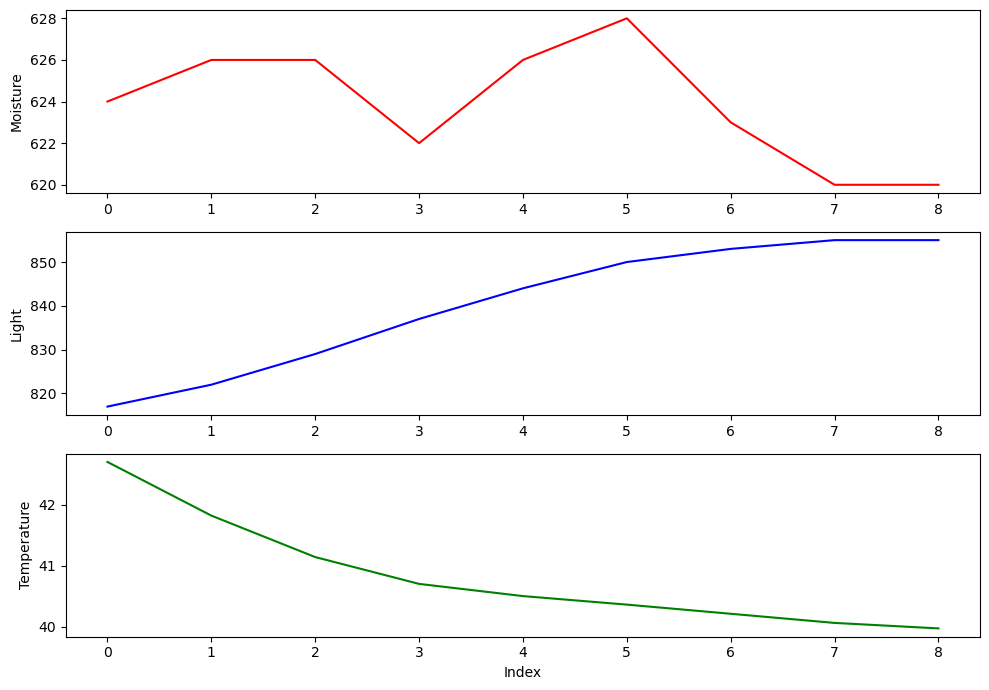

In [107]:
import matplotlib.pyplot as plt

# Plotting the graph
plt.figure(figsize=(10, 7))
plt.subplot(3, 1, 1)
plt.plot(df.index, df['Moisture'], 'r')
plt.ylabel('Moisture')

plt.subplot(3, 1, 2)
plt.plot(df.index, df['Light'], 'b')
plt.ylabel('Light')

plt.subplot(3, 1, 3)
plt.plot(df.index, df['Temperature'], 'g')
plt.ylabel('Temperature')
plt.xlabel('Index')

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


In [108]:
df['Moisture'].min()

620

In [109]:
df['Light'].min()

817

In [110]:
df['Temperature'].min()

39.97

In [111]:
df['Temperature'].max()

42.7

In [81]:
import requests

# Get the latest entry from the dataframe
latest_entry = df.iloc[-1]

# Check if moisture value is lesser than 300
if latest_entry['Moisture'] < 300:
    # Compose the message
    message = f"The moisture level is {latest_entry['Moisture']} which is lesser than 20."

    # Send the message using FormsPree
    url = 'https://formspree.io/f/moqzzpql'
    payload = {
        'message': message,
        'email': 'your_email@example.com'  # Replace with your email
    }

    response = requests.post(url, data=payload)

    if response.status_code == 200:
        print("Message sent successfully.")
    else:
        print("Failed to send message.")
else:
    print("Moisture level is not lesser than Testing.")


Message sent successfully.


In [42]:
import requests

# Get the latest entry from the dataframe
latest_entry = df.iloc[-1]

# Check if temperature value is greater than 50
if latest_entry['Temperature'] > 50:
    # Compose the message
    message = f"The temperature is {latest_entry['Temperature']} which is greater than 50."

    # Send the message using FormsPree
    url = 'https://formspree.io/f/moqzzpql'
    payload = {
        'message': message,
        'email': 'your_email@example.com'  # Replace with your email
    }

    response = requests.post(url, data=payload)

    if response.status_code == 200:
        print("Message sent successfully.")
    else:
        print("Failed to send message.")
else:
    print("Temperature is not greater than 50.")


Temperature is not greater than 50.


In [84]:
import requests

# Get the latest entry from the dataframe
latest_entry = df.iloc[-1]

# Check if light value is greater than 80
if latest_entry['Light'] > 80:
    # Compose the message
    message = f"The light level is {latest_entry['Light']} which is greater than 80."

    # Send the message using FormsPree
    url = 'https://formspree.io/f/moqzzpql'
    payload = {
        'message': message,
        'email': 'your_email@example.com'  # Replace with your email
    }

    response = requests.post(url, data=payload)

    if response.status_code == 200:
        print("Message sent successfully.")
    else:
        print("Failed to send message.")
else:
    print("Light level is not greater than 80.")


Message sent successfully.


In [49]:
df

,Moisture,Light,Temperature
0,1023,970,43.39
1,1019,961,43.68
2,1018,962,40.31
3,1020,969,45.00
4,1018,959,39.92
...,...,...,...
291,1018,964,40.80
292,1018,966,40.41
293,1019,967,41.38
294,1019,971,45.00
